In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
calendar_BR = pd.read_csv('C:/Users/ivans/Desktop/Cyberdata/Airbnb/Barossa/calendar.csv')
calendar_MB = pd.read_csv('C:/Users/ivans/Desktop/Cyberdata/Airbnb/Melbourne/calendar.csv')
calendar_NR = pd.read_csv('C:/Users/ivans/Desktop/Cyberdata/Airbnb/NorthernRivers/calendar.csv')
calendar_SN = pd.read_csv('C:/Users/ivans/Desktop/Cyberdata/Airbnb/Sydney/calendar.csv')
calendar_TM = pd.read_csv('C:/Users/ivans/Desktop/Cyberdata/Airbnb/Tasmania/calendar.csv')
calendar_WA = pd.read_csv('C:/Users/ivans/Desktop/Cyberdata/Airbnb/WesternAustralia/calendar.csv')
df_location = pd.read_csv('C:/Users/ivans/Desktop/Cyberdata/New folder/df_listing_location.csv')

In [3]:
frames_listing= [calendar_BR, calendar_MB, calendar_NR, calendar_SN, calendar_TM, calendar_WA]
df_calendar= pd.concat(frames_listing)
df_calendar['date']=pd.to_datetime(df_calendar['date'])
df_calendar['year'] = df_calendar['date'].map(lambda x: x.year)
df_calendar['month'] = df_calendar['date'].map(lambda x: x.month)
df_calendar['weekday'] = pd.Series(df_calendar.date).dt.dayofweek

df_calendar.reset_index()
df_calendar.tail()

,listing_id,date,available,price,year,month,weekday
4135810,26752464,2018-07-14,t,$40.00,2018,7,5
4135811,26752464,2018-07-13,t,$40.00,2018,7,4
4135812,26752464,2018-07-12,t,$40.00,2018,7,3
4135813,26752464,2018-07-11,t,$40.00,2018,7,2
4135814,26752464,2018-07-10,t,$40.00,2018,7,1


In [4]:
df_calendar.columns = ['id', 'date', 'available', 'price', 'year', 'month', 'weekday']

In [5]:
df_calendar.date.min()

Timestamp('2018-05-21 00:00:00')

In [6]:
df_calendar.date.max()

Timestamp('2019-07-10 00:00:00')

In [7]:
df_calendar.shape

(27778325, 7)

### Drop the rows where the room is not available.

In [8]:
df_calendar=df_calendar[df_calendar.available=='t']

In [9]:
df_calendar.isnull().sum()

id           0
date         0
available    0
price        0
year         0
month        0
weekday      0
dtype: int64

In [10]:
df_calendar.price=df_calendar.price.map(lambda x : str(x).replace('$',''))
df_calendar.price=df_calendar.price.map(lambda x : str(x).replace(',',''))

In [11]:
df_calendar.price=df_calendar.price.map(lambda x : np.round(float(x), decimals=2))

In [12]:
df_calendarwl=pd.merge(df_calendar, df_location, on='id')
df_calendarwl.drop(['Unnamed: 0', 'available'], inplace=True, axis=1)
df_calendarwl.set_index('date', inplace=True)
df_calendarwl.head()

,id,price,year,month,weekday,city
date,,,,,,
2019-05-20,4551374,280.0,2019,5,0,Barossa
2019-05-19,4551374,280.0,2019,5,6,Barossa
2019-05-18,4551374,280.0,2019,5,5,Barossa
2019-05-17,4551374,280.0,2019,5,4,Barossa
2019-05-16,4551374,280.0,2019,5,3,Barossa


In [13]:
df_calendarwl.tail()

,id,price,year,month,weekday,city
date,,,,,,
2018-07-14,26752464,40.0,2018,7,5,WesternAustralia
2018-07-13,26752464,40.0,2018,7,4,WesternAustralia
2018-07-12,26752464,40.0,2018,7,3,WesternAustralia
2018-07-11,26752464,40.0,2018,7,2,WesternAustralia
2018-07-10,26752464,40.0,2018,7,1,WesternAustralia


In [14]:
df_calendarwl_BR=df_calendarwl[df_calendarwl.city=='Barossa']
df_calendarwl_MB=df_calendarwl[df_calendarwl.city=='Melbourne']
df_calendarwl_NR=df_calendarwl[df_calendarwl.city=='NorthernRivers']
df_calendarwl_SN=df_calendarwl[df_calendarwl.city=='Sydney']
df_calendarwl_TM=df_calendarwl[df_calendarwl.city=='Tasmania']
df_calendarwl_WA=df_calendarwl[df_calendarwl.city=='WesternAustralia']

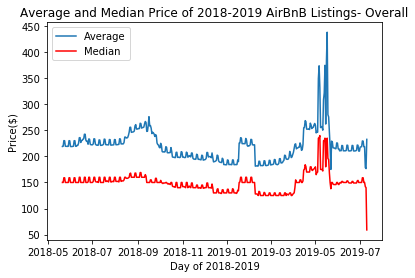

In [15]:
date=[]
avg_price=[]
median_price=[]
for x in df_calendarwl.index.unique():
    date.append(x)
    date = sorted(date, reverse=False)
    avg_price.append(df_calendarwl[df_calendarwl.index==x]['price'].mean())
    median_price.append(df_calendarwl[df_calendarwl.index==x]['price'].median())
plt.plot(date, avg_price, label= "Average")
plt.plot(date, median_price, color='red', label = "Median")
plt.ylabel('Price($)')
plt.xlabel('Day of 2018-2019')
plt.title('Average and Median Price of 2018-2019 AirBnB Listings- Overall')
plt.legend()

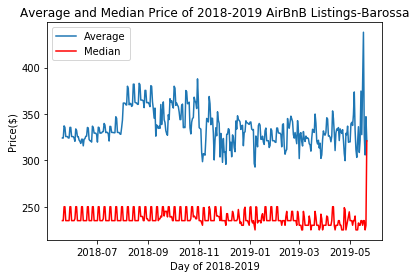

In [16]:
date=[]
avg_price=[]
median_price=[]
for x in df_calendarwl_BR.index.unique():
    date.append(x)
    date = sorted(date, reverse=False)
    avg_price.append(df_calendarwl_BR[df_calendarwl_BR.index==x]['price'].mean())
    median_price.append(df_calendarwl_BR[df_calendarwl_BR.index==x]['price'].median())
plt.plot(date, avg_price, label= "Average")
plt.plot(date, median_price, color='red', label = "Median")
plt.ylabel('Price($)')
plt.xlabel('Day of 2018-2019')
plt.title('Average and Median Price of 2018-2019 AirBnB Listings-Barossa')
plt.legend()

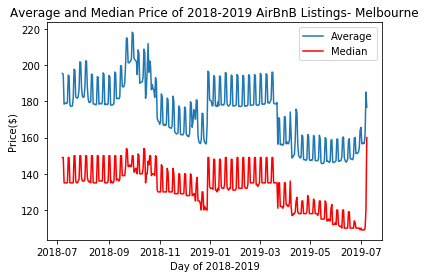

In [17]:
date=[]
avg_price=[]
median_price=[]
for x in df_calendarwl_MB.index.unique():
    date.append(x)
    date = sorted(date, reverse=False)
    avg_price.append(df_calendarwl_MB[df_calendarwl_MB.index==x]['price'].mean())
    median_price.append(df_calendarwl_MB[df_calendarwl_MB.index==x]['price'].median())
plt.plot(date, avg_price, label= "Average")
plt.plot(date, median_price, color='red', label = "Median")
plt.ylabel('Price($)')
plt.xlabel('Day of 2018-2019')
plt.title('Average and Median Price of 2018-2019 AirBnB Listings- Melbourne')
plt.legend()

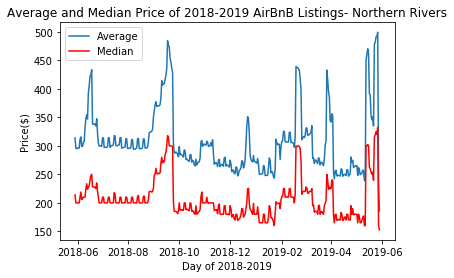

In [18]:
date=[]
avg_price=[]
median_price=[]
for x in df_calendarwl_NR.index.unique():
    date.append(x)
    date = sorted(date, reverse=False)
    avg_price.append(df_calendarwl_NR[df_calendarwl_NR.index==x]['price'].mean())
    median_price.append(df_calendarwl_NR[df_calendarwl_NR.index==x]['price'].median())
plt.plot(date, avg_price, label= "Average")
plt.plot(date, median_price, color='red', label = "Median")
plt.ylabel('Price($)')
plt.xlabel('Day of 2018-2019')
plt.title('Average and Median Price of 2018-2019 AirBnB Listings- Northern Rivers')
plt.legend()

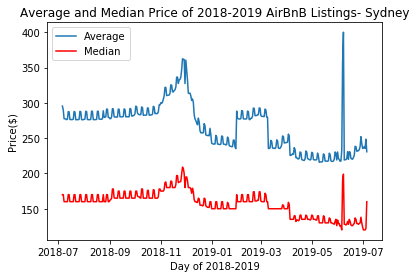

In [19]:
date=[]
avg_price=[]
median_price=[]
for x in df_calendarwl_SN.index.unique():
    date.append(x)
    date = sorted(date, reverse=False)
    avg_price.append(df_calendarwl_SN[df_calendarwl_SN.index==x]['price'].mean())
    median_price.append(df_calendarwl_SN[df_calendarwl_SN.index==x]['price'].median())
plt.plot(date, avg_price, label= "Average")
plt.plot(date, median_price, color='red', label = "Median")
plt.ylabel('Price($)')
plt.xlabel('Day of 2018-2019')
plt.title('Average and Median Price of 2018-2019 AirBnB Listings- Sydney')
plt.legend()

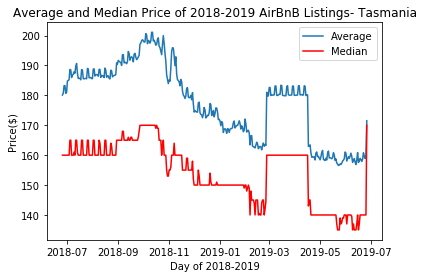

In [20]:
date=[]
avg_price=[]
median_price=[]
for x in df_calendarwl_TM.index.unique():
    date.append(x)
    date = sorted(date, reverse=False)
    avg_price.append(df_calendarwl_TM[df_calendarwl_TM.index==x]['price'].mean())
    median_price.append(df_calendarwl_TM[df_calendarwl_TM.index==x]['price'].median())
plt.plot(date, avg_price, label= "Average")
plt.plot(date, median_price, color='red', label = "Median")
plt.ylabel('Price($)')
plt.xlabel('Day of 2018-2019')
plt.title('Average and Median Price of 2018-2019 AirBnB Listings- Tasmania')
plt.legend()

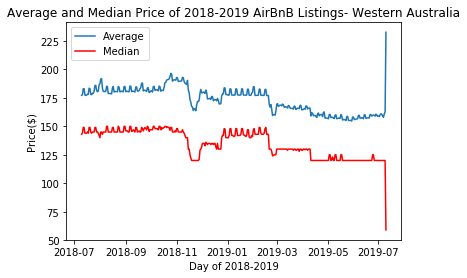

In [21]:
date=[]
avg_price=[]
median_price=[]
for x in df_calendarwl_WA.index.unique():
    date.append(x)
    date = sorted(date, reverse=False)
    avg_price.append(df_calendarwl_WA[df_calendarwl_WA.index==x]['price'].mean())
    median_price.append(df_calendarwl_WA[df_calendarwl_WA.index==x]['price'].median())
plt.plot(date, avg_price, label= "Average")
plt.plot(date, median_price, color='red', label = "Median")
plt.ylabel('Price($)')
plt.xlabel('Day of 2018-2019')
plt.title('Average and Median Price of 2018-2019 AirBnB Listings- Western Australia')
plt.legend()

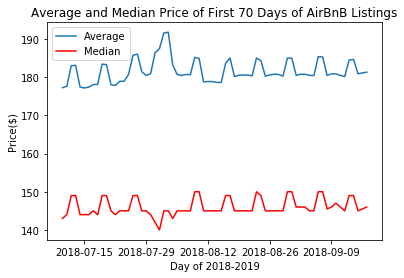

In [22]:
plt.plot((date[0:70]), avg_price[0:70], label= "Average")
plt.plot((date[0:70]),median_price[0:70],color='red', label = "Median")
plt.ylabel('Price($)')
plt.xlabel('Day of 2018-2019')
plt.title('Average and Median Price of First 70 Days of AirBnB Listings')
plt.legend()

Text(0.5,1,'Average and Median Price per Day of the Week')

<Figure size 720x1080 with 0 Axes>

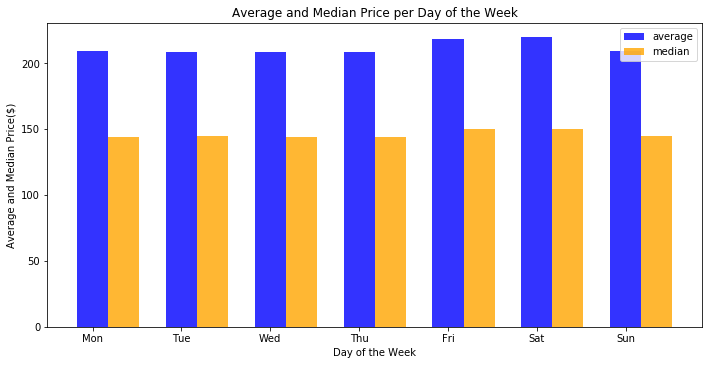

In [23]:
daily_avg_price=[]
daily_median_price=[]
days=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
plt.figure(figsize=(10,15))
for i in range(7):
    daily_avg_price.append(df_calendarwl[df_calendarwl['weekday'] == i]['price'].mean())
    daily_median_price.append(df_calendarwl[df_calendarwl['weekday'] == i]['price'].median())

plt.figure(figsize=(10, 5))
n_groups = 7
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

mean = plt.bar(index, daily_avg_price, bar_width,
                 alpha=opacity,
                 color='blue',
                 label='average')
 
median = plt.bar(index + bar_width, daily_median_price, bar_width,
                 alpha=opacity,
                 color='orange',
                 label='median')
    

plt.xticks(range(len(daily_avg_price)),days)
plt.ylabel('Average and Median Price($)')
plt.xlabel('Day of the Week')
plt.legend()
plt.tight_layout()
plt.title('Average and Median Price per Day of the Week')

In [24]:
new_df=pd.DataFrame(list(zip(date, avg_price, median_price)), columns=['date', 'avg_price', 'median_price'])
new_df.head()

,date,avg_price,median_price
0,2018-07-10,177.253672,143.0
1,2018-07-11,177.650806,144.0
2,2018-07-12,183.015173,149.0
3,2018-07-13,183.114144,149.0
4,2018-07-14,177.428640,144.0


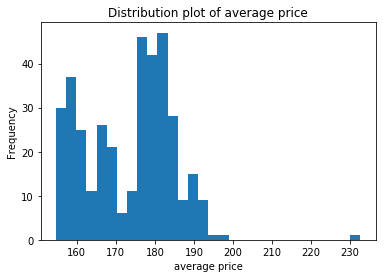

In [25]:
plt.hist(new_df['avg_price'], bins=30)
plt.title("Distribution plot of average price")
plt.xlabel("average price")
plt.ylabel("Frequency")
plt.show()

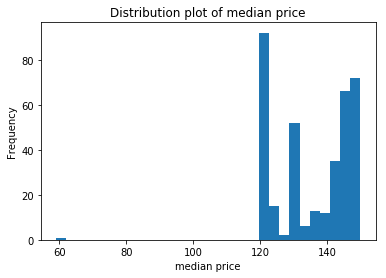

In [26]:
plt.hist(new_df['median_price'], bins=30)
plt.title("Distribution plot of median price")
plt.xlabel("median price")
plt.ylabel("Frequency")
plt.show()

In [27]:
new_df['median_price'].nunique()

35

In [28]:
multiplier = []
for i in range(7):
    multiplier.append(daily_avg_price[i]/daily_avg_price[0])

In [29]:
multiplier

[1.0,
 0.9983678837788241,
 0.9970916272999576,
 0.9974344187872638,
 1.044455775491054,
 1.0501286165769828,
 1.0024611763304827]

In [30]:
multiplier=pd.DataFrame(multiplier, index=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], columns=['multiplier'])

In [31]:
multiplier

,multiplier
Mon,1.000000
Tue,0.998368
Wed,0.997092
Thu,0.997434
Fri,1.044456
Sat,1.050129
Sun,1.002461


### Conclusion
The results are very much in line with what we saw earlier in our seasonality-exploration file. Monday and Tuesday see a slight dip in their prices(99.8%) while Friday and Saturday see a sizable increase in prices (105%).

Seasonality is perhaps the most promising area of the entire project because it shows that many Airbnb listers are not taking advantage of dynamic pricing by the day of the week, something that is important to establish optimal pricing. Already, there are some promising results-- people should price Friday and Saturday the highest and Tuesday and Wednesday the lowest.